In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from scipy import stats
from tqdm import tqdm
from sensitivity_tests import *
from utilities import kendall_tau

In [4]:
DATA_CSV_NAME = "sensitivity_dataset_fixed.csv"

In [5]:
data = pd.read_csv(DATA_CSV_NAME)[["D","P", "p_lowerbound"]]

In [6]:
data = data.loc[data["p_lowerbound"]>2]
len(data)

1

In [7]:
data.head()

,D,P,p_lowerbound
1024,"[[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], [...","[(8, 2, 0, 1, 3, 13, 10, 9, 7, 4, 6, 5, 12, 11)]",1


In [8]:
def read_P(string):
    return json.loads(string.replace("(", "[").replace(")", "]"))

def read_D(string):
    return np.array(json.loads(string))

In [7]:
massey = MasseyRankingAlgorithm()
colley = ColleyRankingAlgorithm()

massey_max_taus = []
massey_mean_taus = []
colley_max_taus = []
colley_mean_taus = []
for idx in tqdm(range(len(data))):
    D = read_D(data["D"].iloc[idx])
    P = read_P(data["P"].iloc[idx])
    massey_ranking = massey.rank(D)
    colley_ranking = colley.rank(D)
    massey_taus = []
    colley_taus = []
    for opt_ranking in P:
        m_tau = kendall_tau(opt_ranking, massey_ranking)
        massey_taus.append(m_tau)
        c_tau = kendall_tau(opt_ranking, colley_ranking)
        colley_taus.append(c_tau)
    massey_max_taus.append(np.max(massey_taus))
    massey_mean_taus.append(np.mean(massey_taus))
    colley_max_taus.append(np.max(colley_taus))
    colley_mean_taus.append(np.mean(colley_taus))

data["massey_max_tau"] = massey_max_taus
data["colley_max_tau"] = colley_max_taus
data["massey_mean_tau"] = massey_mean_taus
data["colley_mean_tau"] = colley_mean_taus

100%|██████████| 1238/1238 [00:40<00:00, 30.47it/s]


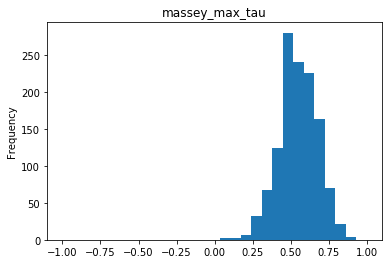

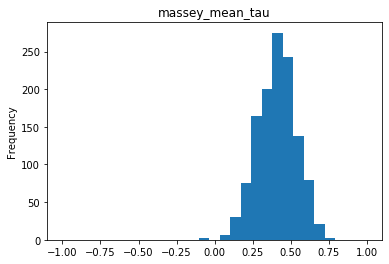

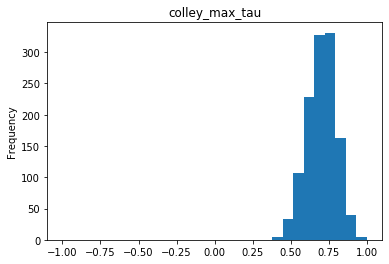

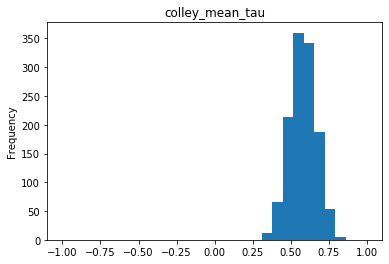

In [8]:
for col in ["massey_max_tau", "massey_mean_tau", "colley_max_tau", "colley_mean_tau"]:
    data[col].plot.hist(title=col, bins=np.linspace(start=-1.0, stop=1.0, num=30))
    plt.show()

In [9]:
worst_massey_idx = data["massey_max_tau"].idxmin()
worst_massey_idx, data["massey_max_tau"].loc[worst_massey_idx]

(113, 0.05494505494505495)

In [10]:
worst_massey_D = read_D(data.loc[worst_massey_idx]["D"])
worst_massey_P = read_P(data.loc[worst_massey_idx]["P"])
worst_massey_ranking = massey.rank(worst_massey_D)
worst_massey_P, worst_massey_ranking

taus = []
for opt_rank in worst_massey_P:
    tau = kendall_tau(worst_massey_ranking, opt_rank)
    taus.append(tau)
closest_idx = np.array(taus).argmax()
worst_massey_P[closest_idx], worst_massey_ranking

([12, 3, 4, 11, 13, 2, 1, 5, 7, 6, 10, 9, 8, 0],
 [4, 9, 7, 3, 10, 8, 5, 12, 11, 2, 1, 6, 0, 13])

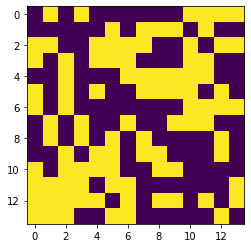

In [11]:
plt.imshow(worst_massey_D)

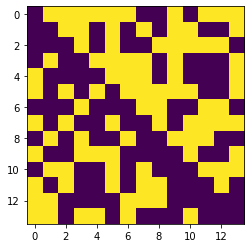

In [12]:
r = worst_massey_P[closest_idx]
plt.imshow(worst_massey_D[r,:][:,r])

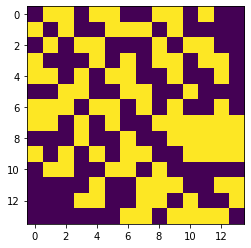

In [13]:
r = worst_massey_ranking
plt.imshow(worst_massey_D[r,:][:,r])

In [14]:
worst_colley_idx = data["colley_max_tau"].idxmin()
worst_colley_idx, data["colley_max_tau"].loc[worst_colley_idx]

(984, 0.4065934065934066)

In [15]:
worst_colley_D = read_D(data.loc[worst_colley_idx]["D"])
worst_colley_P = read_P(data.loc[worst_colley_idx]["P"])
worst_colley_ranking = colley.rank(worst_colley_D)
worst_colley_P, worst_colley_ranking

taus = []
for opt_rank in worst_colley_P:
    tau = kendall_tau(worst_colley_ranking, opt_rank)
    taus.append(tau)
closest_idx = np.array(taus).argmax()
worst_colley_P[closest_idx], worst_colley_ranking

([9, 1, 11, 10, 7, 12, 2, 5, 13, 8, 0, 3, 4, 6],
 [1, 9, 2, 5, 13, 11, 12, 3, 4, 6, 10, 7, 8, 0])

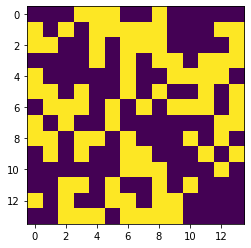

In [16]:
plt.imshow(worst_colley_D)

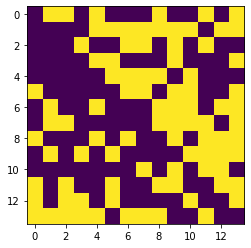

In [17]:
r = worst_colley_P[closest_idx]
plt.imshow(worst_colley_D[r,:][:,r])

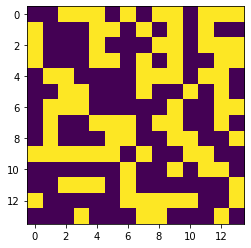

In [18]:
r = worst_colley_ranking
plt.imshow(worst_colley_D[r,:][:,r])